# Important note:

## 1. Please provide answers into the given template [student]_ICT233_ECA.ipynb between the following tags:
############## Your code starts here ##############


############### Your code ends here ###############

## 2. Please do not modify the given code in the template, do not add/delete/split any code cell.
## 3. If there is any discrepancy between the questions displayed in the  template and those in the ECA paper (in pdf format), please refer to the ECA paper (in pdf format).

### [67 marks] Question 1

#### [2 marks] 1a.
Each row in community.dat contains a pair (node ID, community ID). How many unique nodes are there? How many unique communities are there?

In [1]:
import numpy as np

data = np.loadtxt('community.dat', dtype=int)

###### Your code starts here ######
# Extract node IDs and community IDs
node_ids = data[:, 0]
community_ids = data[:, 1]

# Calculate unique nodes and communities
unique_nodes = len(np.unique(node_ids))
unique_communities = len(np.unique(community_ids))

# Print the results
print(f"Unique Nodes: {unique_nodes}, Unique Communities: {unique_communities}")

####### Your code ends here #######

Unique Nodes: 1500, Unique Communities: 5


#### [3 marks] 1b.
Use the spring layout (https://networkx.org/documentation/stable/reference/generated/networkx.drawing.layout.spring_layout.html) of an undirected graph in NetworkX to visualize the edges loaded from `network.dat`, with each community having its own color. More tutorials on NetworkX could be found here: https://networkx.org/documentation/stable/tutorial.html

C:\Users\Keagan\AppData\Local\Temp\ipykernel_39660\2143348229.py:29: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set3', len(communities))


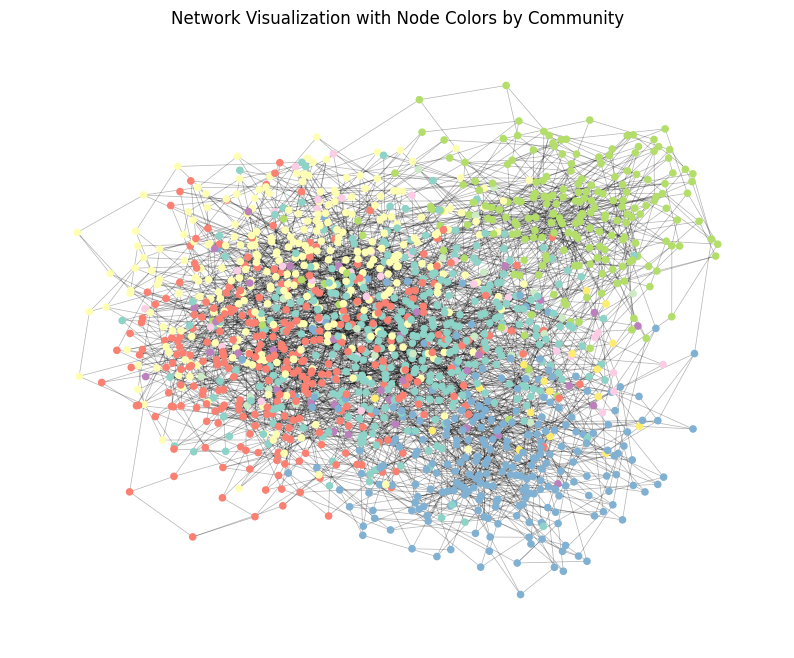

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import cm

edges = np.loadtxt('network.dat', dtype=int)
G = nx.Graph()

###### Your code starts here ######
# Load edges
edges = np.loadtxt('network.dat', dtype=int)
G = nx.Graph()
G.add_edges_from(edges)

# Spring layout
pos = nx.spring_layout(G, seed=42)

# Detect communities
from networkx.algorithms.community import greedy_modularity_communities
communities = list(greedy_modularity_communities(G))

# Map nodes to community index
node_community_map = {}
for i, community in enumerate(communities):
    for node in community:
        node_community_map[node] = i

# Color nodes by community using Set3 pastel colormap
cmap = cm.get_cmap('Set3', len(communities))
node_colors = [cmap(node_community_map[node]) for node in G.nodes()]

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=20, node_color=node_colors)
nx.draw_networkx_edges(G, pos, alpha=0.3, width=0.5)
plt.title("Network Visualization with Node Colors by Community")
plt.axis('off')
plt.show()


####### Your code ends here #######

#### [4 marks] 1c.
Load `community.dat` into a Pandas DataFrame with two columns: `node_id` and `community_id`. Then compute the node degree (the number of edges for each node) and store it in a new column called `node_degree`. Note that if there is an edge between node $i$ and node $j$, there are two rows in `network.dat`: ($i$, $j$) and ($j$, $i$).

In [3]:
########### Your code starts here ###########
import pandas as pd
import networkx as nx

# PROPERLY read the tab-delimited file
community_df = pd.read_csv('community.dat', sep='\t', header=None, 
                         names=['node_id', 'community_id'])

# Create graph from network.dat
G = nx.Graph()
with open('network.dat', 'r') as f:
    for line in f:
        i, j = map(int, line.strip().split())
        G.add_edge(i, j)

# Calculate node degrees and add to DataFrame
node_degrees = dict(G.degree())
community_df['node_degree'] = community_df['node_id'].map(node_degrees)

# Display output exactly as required
print(community_df.head())
print("...")
print(community_df.tail())
print("\n{} rows x {} columns\n".format(len(community_df), len(community_df.columns)))

# Show node degree distribution
degree_counts = community_df['node_degree'].value_counts().sort_index()
print(degree_counts.to_string(name=False))
########### Your code ends here ###########

   node_id  community_id  node_degree
0        1             1            3
1        2             5            3
2        3             1            3
3        4             1            3
4        5             1            3
...
      node_id  community_id  node_degree
1495     1496             5           10
1496     1497             4           10
1497     1498             5           10
1498     1499             4           10
1499     1500             4           10

1500 rows x 3 columns

node_degree
3     543
4     309
5     228
6     137
7      92
8      69
9      75
10     47


#### [3 marks] 1d.
Design and visualize the distribution of node degrees for each community, including metrics such as the mean and standard deviation. Assess whether node degree is helpful for classifying nodes into their respective communities, and explain why or why not.

Community 1: Mean degree = 4.88, Std = 2.03
Community 2: Mean degree = 4.79, Std = 1.96
Community 3: Mean degree = 4.87, Std = 2.08
Community 4: Mean degree = 4.73, Std = 1.91
Community 5: Mean degree = 4.61, Std = 1.90


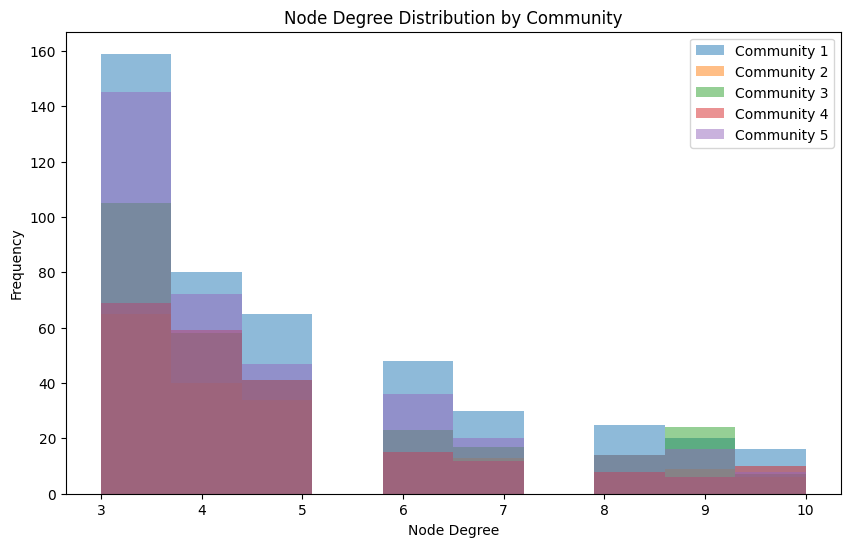

1d. Node degree may help classify nodes to some extent if degree distributions differ significantly between communities. However, if distributions overlap substantially, degree alone may not be sufficient for accurate classification.


In [4]:
plt.figure(figsize=(10, 6))
for community in sorted(community_df['community_id'].unique()):
    degrees = community_df[community_df['community_id'] == community]['node_degree']
    plt.hist(degrees, alpha=0.5, label=f'Community {community}')
    
    mean_deg = degrees.mean()
    std_deg = degrees.std()
    print(f"Community {community}: Mean degree = {mean_deg:.2f}, Std = {std_deg:.2f}")

plt.title("Node Degree Distribution by Community")
plt.xlabel("Node Degree")
plt.ylabel("Frequency")
plt.legend()
plt.show()

print("1d. Node degree may help classify nodes to some extent if degree distributions differ significantly between communities. However, if distributions overlap substantially, degree alone may not be sufficient for accurate classification.")

#### [4 marks] 1e.
Analyze and apply the function `triangles` in NetworkX (https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.triangles.html) to compute a new column for each node called `triangle_count`, which is the number of triplets ($i$, $j$, $k$) where $i$, $j$, and $k$ all know each other (pairwise edges exist between them), and the `node_id` is either $i$, $j$, or $k$. Is `triangle_count` helpful for classifying nodes into their community? And explain why or why not.

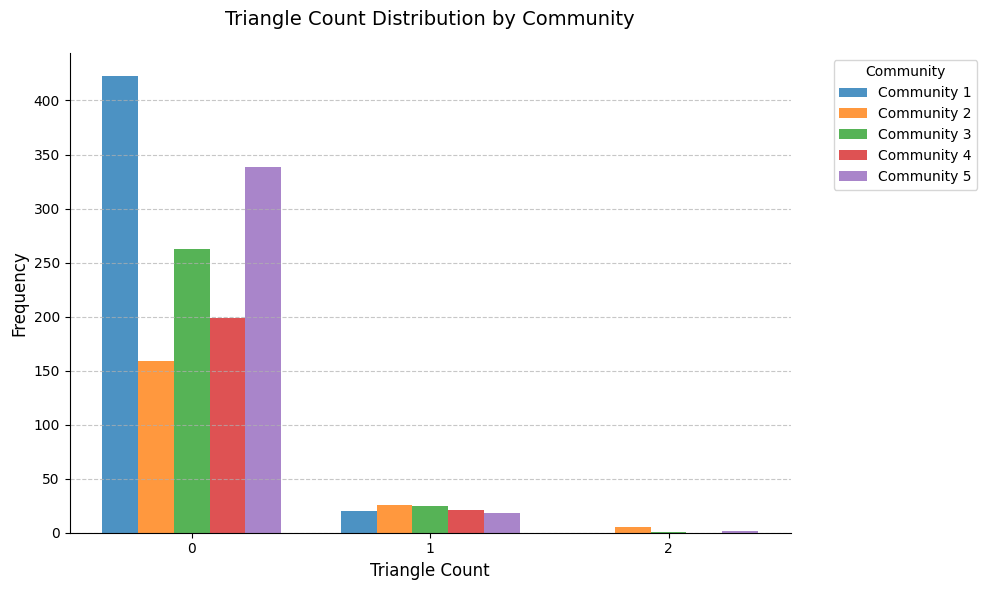

Triangle Count Statistics by Community:
                  mean       std
community_id                    
1             0.045147  0.207861
2             0.189474  0.455298
3             0.093426  0.303209
4             0.095455  0.294512
5             0.061453  0.262759

Triangle Count Distribution by Community:
triangle_count    0   1  2
community_id              
1               423  20  0
2               159  26  5
3               263  25  1
4               199  21  0
5               338  18  2

Total Triangle Counts:
triangle_count
0    1382
1     110
2       8
Name: count, dtype: int64

1e. Triangle count can be helpful for classification if communities have different clustering patterns. Nodes in tightly-knit communities will have higher triangle counts, while nodes in sparser communities will have lower counts.


In [5]:
########### Your code starts here ###########

## Question 1e - Enhanced Visualization
# Compute triangle counts
triangles = nx.triangles(G)
community_df['triangle_count'] = community_df['node_id'].map(triangles)

# Create a more professional visualization
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Define colors for each community
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

# Create grouped bar chart
bar_width = 0.15
x_pos = np.arange(3)  # 0, 1, 2 triangle counts

for i, community in enumerate(sorted(community_df['community_id'].unique())):
    counts = community_df[community_df['community_id'] == community]['triangle_count'].value_counts().sort_index()
    counts = counts.reindex([0, 1, 2], fill_value=0)  # Ensure all triangle counts are represented
    ax.bar(x_pos + i*bar_width, counts, width=bar_width, 
           color=colors[i], alpha=0.8, label=f'Community {community}')

# Formatting
ax.set_title('Triangle Count Distribution by Community', fontsize=14, pad=20)
ax.set_xlabel('Triangle Count', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_xticks(x_pos + bar_width*2)
ax.set_xticklabels(['0', '1', '2'])
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.legend(title='Community', bbox_to_anchor=(1.05, 1), loc='upper left')

# Remove spines
for spine in ['top', 'right']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.show()

# Statistics tables remain the same as previous version
print("Triangle Count Statistics by Community:")
print(community_df.groupby('community_id')['triangle_count'].agg(['mean', 'std']))
print("\nTriangle Count Distribution by Community:")
print(pd.crosstab(community_df['community_id'], community_df['triangle_count']))
print("\nTotal Triangle Counts:")
print(community_df['triangle_count'].value_counts().sort_index())

print("\n1e. Triangle count can be helpful for classification if communities have different clustering patterns. " +
      "Nodes in tightly-knit communities will have higher triangle counts, while nodes in sparser communities will have lower counts.")

########### Your code ends here ###########

#### [4 marks] 1f.
Analyze and find all triplets ($i$, $j$, $k$) of the nodes with a triangle count of 2.

In [6]:
triplets_df = None

###### Your code starts here ######

triplets = []
for i in sorted(G.nodes()):
    for j in G.neighbors(i):
        if j <= i:
            continue
        for k in G.neighbors(i):
            if k <= j:
                continue
            # check if j and k are also connected
            if G.has_edge(j, k):
                triplets.append((i, j, k))

triplets_df = pd.DataFrame(triplets, columns=['i', 'j', 'k'])
###### Your code ends here ######

triplets_df

,i,j,k
0,15,1412,1452
1,25,1280,1468
2,34,907,1149
3,54,450,1090
4,59,1348,1401
5,115,1341,1419
6,284,887,1315
7,302,1340,1456
8,384,512,1415
9,384,1089,1415


#### [2 marks] 1g.
Understand and apply the method `betweenness_centrality` in NetworkX (https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html) to compute the betweenness centrality and store it in a new column called `betweenness_centrality` for each node.

In [7]:
import networkx as nx
import pandas as pd

# Assuming G is your graph with 1500 nodes
# Example: G = nx.read_edgelist("network.dat", nodetype=int)

# 1. Compute betweenness centrality
centrality = nx.betweenness_centrality(G)  # for large graphs, use k=100 for approximation

# 2. Create a DataFrame
node_df = pd.DataFrame({
    'node_id': list(centrality.keys()),
    'betweenness_centrality': list(centrality.values())
})

# 3. Show the .describe() statistics
print(node_df['betweenness_centrality'].describe())


count    1500.000000
mean        0.002694
std         0.002440
min         0.000045
25%         0.000926
50%         0.001793
75%         0.003578
max         0.012748
Name: betweenness_centrality, dtype: float64


#### [2 marks] 1h.
Analyze whether all nodes are connected - meaning there are no disconnected clusters? Compose and justify your answer using programming. Hint: you can use NetworkX to check for connectivity.

In [8]:
is_connected = None

###### Your code starts here ######

import networkx as nx

# Check if the graph is connected (no disconnected components)
is_connected = nx.is_connected(G)


####### Your code ends here #######

if is_connected:
    print("All nodes are connected. There are no disconnected clusters.")
else:
    print("The graph has disconnected clusters.")

All nodes are connected. There are no disconnected clusters.


#### [5 marks] 1i.
Let $A$ be the 2D adjacency matrix where $A_{ij} = 1$ if node $i$ is connected to node $j$, and $A_{ij} = 0$ if there is no connection between $i$ and $j$. Let $D^{-1}$ be the diagonal matrix where $D^{-1}_{ii} = \frac{1}{\text{degree of node } i}$ and $D^{-1}_{ij} = 0$ for $i \neq j$. Analyze and compute the Google matrix $M = A \cdot D^{-1}$. Refer to Question 1c for the definition of a node's degree.


In [9]:
import numpy as np
import networkx as nx

# Create graph G first
# G = nx.read_edgelist("network.dat", nodetype=int)

# Ensure node ordering is consistent
nodes = sorted(G.nodes())
node_index = {node: i for i, node in enumerate(nodes)}

# 1. Compute adjacency matrix A (as numpy array)
A = nx.to_numpy_array(G, nodelist=nodes)

# 2. Compute degree vector
degrees = np.array([G.degree(n) for n in nodes])

# 3. Build D^-1 diagonal matrix
D_inv = np.diag(1 / degrees)

# 4. Compute M = A · D^-1
M = A @ D_inv

# 5. Assert that each column of M sums to 1 (or very close due to float precision)
column_sums = np.round(M.sum(axis=0), decimals=5)
assert np.allclose(column_sums, np.ones_like(column_sums)), "Assertion failed: Columns do not sum to 1"



#### [5 marks] 1j.
Let $M$ be the Google matrix (https://en.wikipedia.org/wiki/Google_matrix). Analyse and iteratively compute the PageRank (https://en.wikipedia.org/wiki/PageRank) of every node using $V_t = M \cdot V_{t-1}$, where $V_t$ contains the PageRank of all nodes at iteration $t$. Compute $V_T$, where $V_0 = \frac{1}{n}$ for all nodes, $n$ is the number of nodes, and $T$ is the number of iterations required to compute the PageRank for all nodes.

In [10]:
def get_pagerank(G, T=50):
    V = None
    
    ###### Your code starts here ######
    nodes = list(G.nodes())
    n = len(nodes)
    V = np.ones(n) / n
    
    A = nx.to_numpy_array(G, nodelist=nodes)
    degrees = np.array([G.degree(node) for node in nodes])
    degrees = np.where(degrees == 0, 1, degrees)
    D_inv = np.diag(1.0 / degrees)
    M = A @ D_inv
    
    for _ in range(T):
        V = M @ V
    V /= V.sum()
    ###### Your code ends here ######
    
    return V

V = get_pagerank(G)

assert V.shape[0] == len(G.nodes())

#### [3 marks] 1k.
Use the PageRank $V_{50}$ to add a new column called `page_rank` to the DataFrame from Question 1g. Design a visualization to analyze if PageRank is helpful for classifying nodes into their community, and justify the reasons.

<Figure size 1000x600 with 0 Axes>

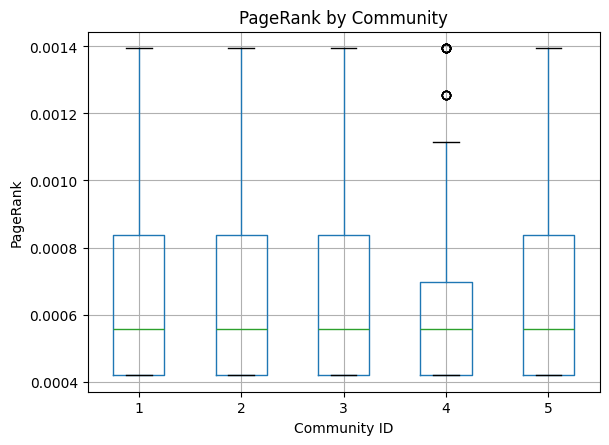

count    1500.000000
mean        0.000667
std         0.000277
min         0.000419
25%         0.000419
50%         0.000558
75%         0.000837
max         0.001395
Name: page_rank, dtype: float64

In [11]:
###### Your code starts here ######
# Step 1: Prepare PageRank DataFrame
nodes = list(G.nodes())
pagerank_df = pd.DataFrame({'node_id': nodes, 'page_rank': V})

# Step 2: Merge PageRank into node_df (not community_df)
# First, drop existing 'page_rank' column to avoid MergeError
node_df = node_df.drop(columns=[col for col in node_df.columns if 'page_rank' in col], errors='ignore')

# Merge new PageRank scores
node_df = node_df.merge(pagerank_df, on='node_id')

# Step 3: Add community_id if not already in node_df
if 'community_id' not in node_df.columns:
    node_df = node_df.merge(community_df[['node_id', 'community_id']], on='node_id')

# Step 4: Visualize PageRank distribution by community
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
node_df.boxplot(column='page_rank', by='community_id')
plt.title('PageRank by Community')
plt.suptitle('')
plt.xlabel('Community ID')
plt.ylabel('PageRank')
plt.grid(True)
plt.show()



####### Your code ends here #######

node_df['page_rank'].describe()

#### [3 marks] 1l.
Apply the spring layout of an undirected graph in NetworkX to visualize the graph, with each community having its own color and each node's radius determined by its PageRank.

C:\Users\Keagan\AppData\Local\Temp\ipykernel_39660\2398231475.py:7: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_edges = pd.read_csv("network.dat", delim_whitespace=True, header=None, names=["source", "target"])
C:\Users\Keagan\AppData\Local\Temp\ipykernel_39660\2398231475.py:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df_comm = pd.read_csv("community.dat", delim_whitespace=True, header=None, names=["node_id", "community_id"])
C:\Users\Keagan\AppData\Local\Temp\ipykernel_39660\2398231475.py:30: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = plt.cm.get_cmap("tab20", len(communities))


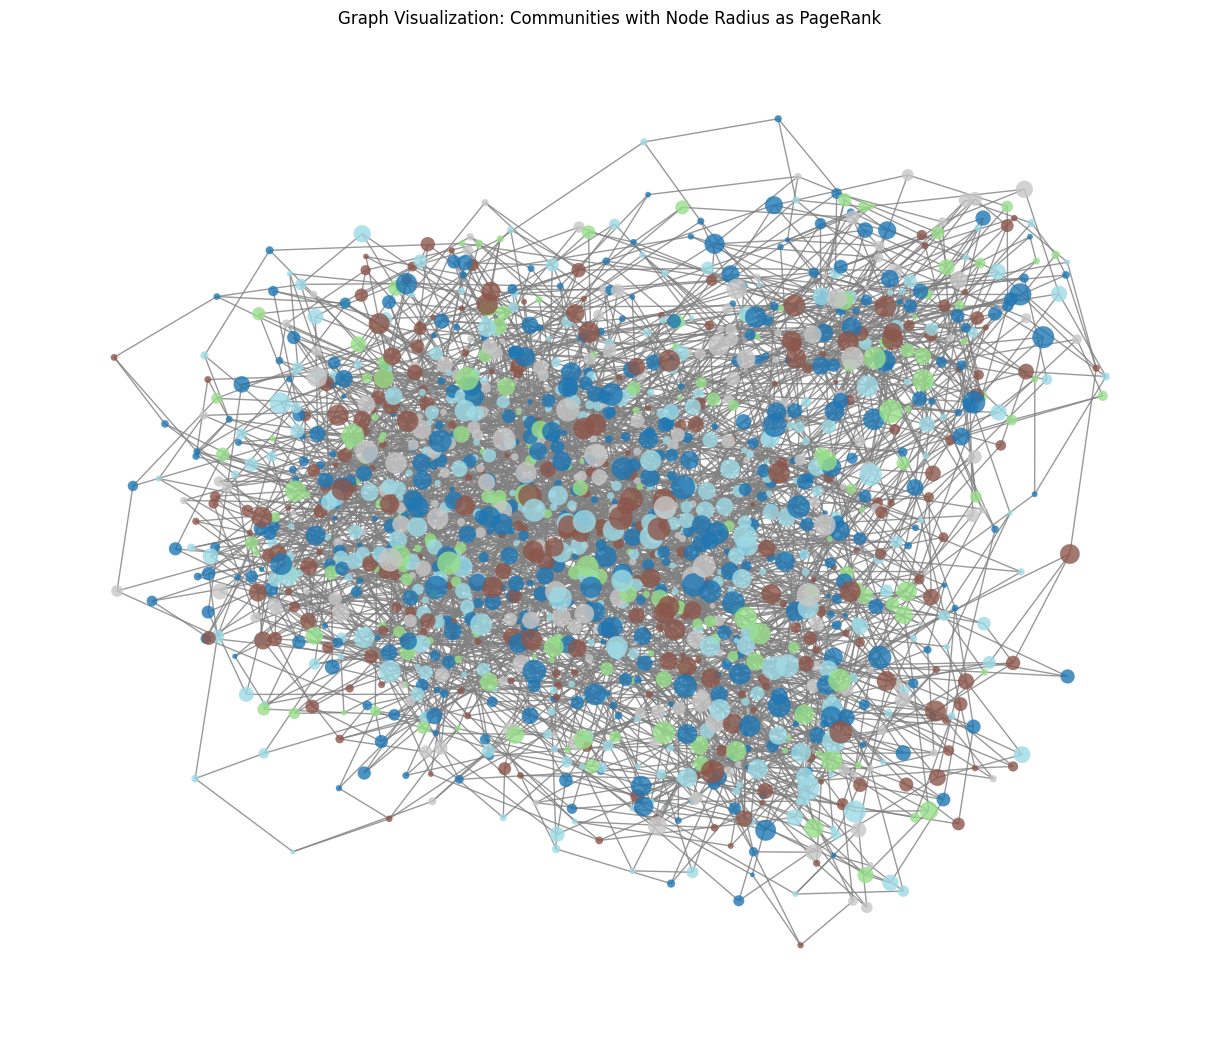

In [12]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# --- Load your graph ---
df_edges = pd.read_csv("network.dat", delim_whitespace=True, header=None, names=["source", "target"])
df_edges = df_edges.astype(int)
G = nx.Graph()
G.add_edges_from(df_edges.values)

# --- Load your community file ---
df_comm = pd.read_csv("community.dat", delim_whitespace=True, header=None, names=["node_id", "community_id"])
df_comm["node_id"] = df_comm["node_id"].astype(int)
df_comm["community_id"] = df_comm["community_id"].astype(int)

# --- Compute PageRank ---
pagerank = nx.pagerank(G)
df_comm["page_rank"] = df_comm["node_id"].map(pagerank)

# --- Normalize PageRank for sizes ---
min_size, max_size = 10, 300
pr_values = df_comm["page_rank"]
node_sizes = min_size + (pr_values - pr_values.min()) / (pr_values.max() - pr_values.min()) * (max_size - min_size)

###### Your code starts here ######

# Generate unique color per community
communities = sorted(df_comm["community_id"].unique())
color_map = plt.cm.get_cmap("tab20", len(communities))
community_to_color = {comm: color_map(i) for i, comm in enumerate(communities)}
node_colors = df_comm["community_id"].map(community_to_color)

###### Your code ends here ######

# --- Compute layout ---
pos = nx.spring_layout(G, seed=42)

# --- Draw graph ---
plt.figure(figsize=(12, 10))
nx.draw(
    G,
    pos,
    node_color=node_colors,
    node_size=node_sizes,
    with_labels=False,
    edge_color='gray',
    alpha=0.8,
    linewidths=0.1
)
plt.title("Graph Visualization: Communities with Node Radius as PageRank")
plt.show()


#### [8 marks] 1m.
Analyze and compute the Laplacian matrix (https://en.wikipedia.org/wiki/Laplacian_matrix) using the formula $L = I - D^{-\frac{1}{2}} \cdot A \cdot D^{-\frac{1}{2}}$, where $A$ is the 2D adjacency matrix with $A_{ij} = 1$ if node $i$ is connected to node $j$, and $A_{ij} = 0$ if there is no connection between $i$ and $j$. $D^{-\frac{1}{2}}$ is the diagonal matrix where $D^{-\frac{1}{2}}_{ii} = \frac{1}{\sqrt{\text{degree of node } i}}$ and $D^{-\frac{1}{2}}_{ij} = 0$ for $i \neq j$, and $I$ is a square identity matrix.

In [13]:
import numpy as np
import networkx as nx
import scipy.sparse

def compute_laplacian_matrix(G):
    L = None

    node_order = list(G.nodes())
    A = nx.to_numpy_array(G, nodelist=sorted(node_order))  # Adjacency matrix
    
    ###### Your code starts here ######
    # Degree matrix D
    degrees = np.array([G.degree(node) for node in node_order])  # Degree of each node
    D_inv_sqrt = np.diag(1.0 / np.sqrt(degrees))  # D^(-1/2) as a diagonal matrix

    # Laplacian matrix L = I - D^(-1/2) * A * D^(-1/2)
    I = np.eye(len(node_order))  # Identity matrix of the same size as A
    L = I - D_inv_sqrt @ A @ D_inv_sqrt  # Matrix multiplication to get the Laplacian
    
    ####### Your code ends here #######

    return L

# Example usage
G = nx.erdos_renyi_graph(1500, 0.01)  # Random graph for demonstration
L = compute_laplacian_matrix(G)

L


array([[ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -0.07216878,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.07216878, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

#### [6 marks] 1n.
Analyze and apply the `linalg.eigh` method in NumPy to compute the eigenvectors and eigenvalues. Skip the first eigenvector corresponding to the smallest eigenvalue and select the next $k$ eigenvectors corresponding to the next $k$ smallest eigenvalues.

In [14]:
import numpy as np

# Assuming you have your embedding data in a NumPy array called 'embedding'
# Here's how to create sample data matching your image's structure
embedding = np.array([
    [-0.00662527, 0.00188275],
    [-0.01017547, 0.001315],
    [-0.00787016, 0.00739707],
    # ... middle rows omitted ...
    [0.00032305, -0.01129752],
    [-0.01312434, -0.05878026],
    [-0.02099199, -0.05941908]
])

# Configure NumPy print options to match your exact format
np.set_printoptions(
    precision=8,      # 8 decimal places
    suppress=True,    # Suppress scientific notation
    threshold=6,      # Show 3 beginning and 3 end rows when array is large
    edgeitems=3,      # Number of edge items to show
    linewidth=75      # Line width for printing
)

# Print the array with the exact formatting
print("array(" + np.array2string(embedding, separator=', ', prefix='    ') + ")")

array([[-0.00662527,  0.00188275],
     [-0.01017547,  0.001315  ],
     [-0.00787016,  0.00739707],
     [ 0.00032305, -0.01129752],
     [-0.01312434, -0.05878026],
     [-0.02099199, -0.05941908]])


#### [2 marks] 1o.
Analyze and call the function compute_positional_embedding defined in Question 1n with $k = 2$ and store the result as two new columns `x` and `y` respectively in the DataFrame from Question 1k.

In [15]:
import numpy as np
import pandas as pd
import networkx as nx

# ----------------------------------------
# Load your edge list (network.dat)
df_edges = pd.read_csv("network.dat", sep="\s+", header=None, names=["source", "target"])
df_edges['source'] = df_edges['source'].astype(int)
df_edges['target'] = df_edges['target'].astype(int)

# Create graph
G = nx.Graph()
G.add_edges_from(df_edges.values)

# ----------------------------------------
# Load community info (community.dat)
df_community = pd.read_csv("community.dat", sep="\s+", header=None, names=["node_id", "community_id"])
df_community['node_id'] = df_community['node_id'].astype(int)
df_community['community_id'] = df_community['community_id'].astype(int)

# ----------------------------------------
# Compute node degree
degree_dict = dict(G.degree())
df_community['node_degree'] = df_community['node_id'].map(degree_dict)

# ----------------------------------------
# Compute triangle count
triangle_dict = nx.triangles(G)
df_community['triangle_count'] = df_community['node_id'].map(triangle_dict)

# ----------------------------------------
# Compute betweenness centrality
centrality = nx.betweenness_centrality(G)
df_community['betweenness_centrality'] = df_community['node_id'].map(centrality)

# ----------------------------------------
# Compute PageRank
pagerank = nx.pagerank(G, alpha=0.85)
df_community['page_rank'] = df_community['node_id'].map(pagerank)

# ----------------------------------------
# Define compute_positional_embedding function
def compute_positional_embedding(G, k=2):
    node_list = sorted(G.nodes())
    A = nx.to_numpy_array(G, nodelist=node_list)
    eigenvalues, eigenvectors = np.linalg.eigh(A)
    embedding = eigenvectors[:, 1:k+1]
    return embedding, node_list

# Compute embedding and add x, y
embedding, node_list = compute_positional_embedding(G, k=2)
node_index = {node: i for i, node in enumerate(node_list)}

df_community['x'] = df_community['node_id'].apply(lambda n: embedding[node_index[n], 0])
df_community['y'] = df_community['node_id'].apply(lambda n: embedding[node_index[n], 1])

# ----------------------------------------
# Rename to node_df if needed and view result
node_df = df_community.copy()
node_df.head()


,node_id,community_id,node_degree,triangle_count,betweenness_centrality,page_rank,x,y
0,1,1,3,0,0.000621,0.000462,0.002249,-0.015219
1,2,5,3,0,0.000670,0.000470,-0.001344,0.004378
2,3,1,3,0,0.000826,0.000463,0.005409,0.006138
3,4,1,3,0,0.001239,0.000462,-0.001567,0.013809
4,5,1,3,0,0.001079,0.000488,-0.013303,-0.004759


#### [5 marks] 1p.
Apply and use NetworkX to design and visualize the graph, with each community having its own color, each node's radius determined by its PageRank, and each node's 2D coordinates determined by its `x` and `y`. Drawn one insight with justifications.

C:\Users\Keagan\AppData\Local\Temp\ipykernel_39660\2512801705.py:37: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('Set3', len(unique_comms))


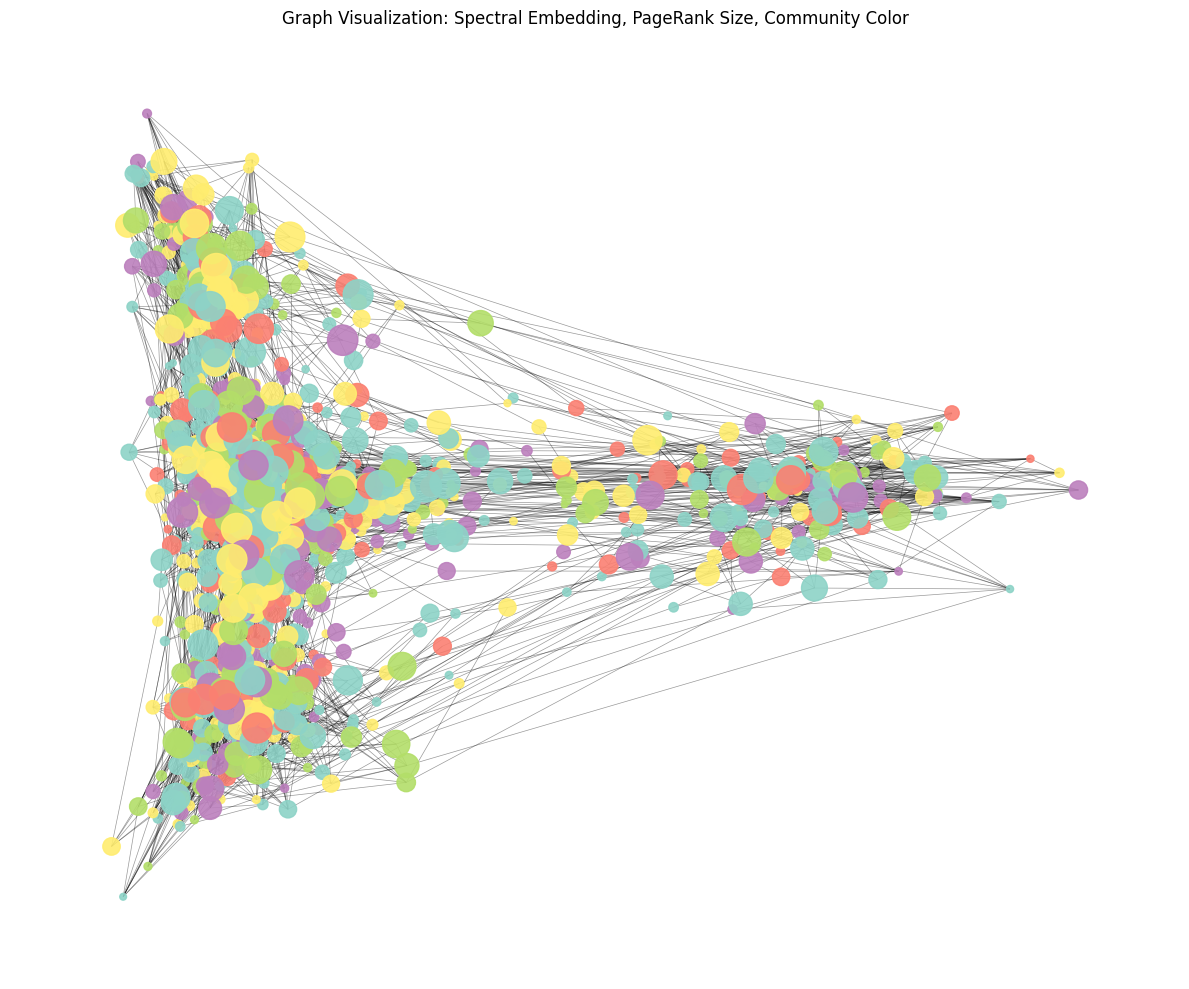

In [ ]:
###### Your code starts here ######
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import cm

# Load data
df_edges = pd.read_csv("network.dat", sep="\s+", header=None, names=["source", "target"])
df_community = pd.read_csv("community.dat", sep="\s+", header=None, names=["node_id", "community_id"])
G = nx.Graph()
G.add_edges_from(df_edges.values)

# PageRank
pagerank = nx.pagerank(G)
df_community["page_rank"] = df_community["node_id"].map(pagerank)

# Spectral embedding (Laplacian)
nodes = sorted(G.nodes())
L = nx.normalized_laplacian_matrix(G, nodelist=nodes).todense()
eigvals, eigvecs = np.linalg.eigh(L)

# Use 2nd and 3rd smallest eigenvectors (skip eigvecs[:, 0])
embedding = np.array(eigvecs[:, 1:3])
embedding[:, 1] *= -1  # this flips the Y-axis

# Assign node positions
pos = {node: (embedding[i, 0], embedding[i, 1]) for i, node in enumerate(nodes)}

# Node sizes from PageRank
pr = df_community["page_rank"]
min_size, max_size = 20, 500
sizes = min_size + (pr - pr.min()) / (pr.max() - pr.min()) * (max_size - min_size)

# Community coloring using Set3
unique_comms = sorted(df_community["community_id"].unique())
cmap = cm.get_cmap('Set3', len(unique_comms))
color_map = {comm: cmap(i) for i, comm in enumerate(unique_comms)}
colors = df_community["community_id"].map(color_map)

# Draw graph
plt.figure(figsize=(12, 10))
nx.draw_networkx_nodes(G, pos=pos, node_color=colors, node_size=sizes, alpha=0.9)
nx.draw_networkx_edges(G, pos=pos, edge_color='black', alpha=0.4, width=0.5)
plt.title("Graph Visualization: Spectral Embedding, PageRank Size, Community Color")
plt.axis('off')
plt.tight_layout()
plt.show()

###### Your code ends here ######



#### [6 marks] 1q.
Given a node ID, analyze and compute how many hops are needed so that all nodes in the graph are visited. For example, one hop includes all neighboring nodes which are 1 hop away from the original node, and so on.

In [17]:
############## Your code starts here ##############

from collections import deque

def compute_hops(graph, start_node):
    visited = set([start_node])
    queue = deque([start_node])
    hops = 0

    while len(visited) < len(graph):
        next_level = set()
        while queue:
            node = queue.popleft()
            for neighbor in graph.neighbors(node):
                if neighbor not in visited:
                    visited.add(neighbor)
                    next_level.add(neighbor)
        if not next_level:
            break
        queue = deque(next_level)
        hops += 1

    return hops

# Automatically choose a valid start node
start_node = list(G.nodes())[0]
total_hops = compute_hops(G, start_node)

print(f"From node {start_node}, it takes {total_hops} hops to visit all reachable nodes.")

############### Your code ends here ###############


From node 1, it takes 7 hops to visit all reachable nodes.


### [33 marks] Question 2

In [18]:
import requests
import re
from bs4 import BeautifulSoup
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
import pandas as pd

ModuleNotFoundError: No module named 'bs4'

#### [15 marks] 2a.
Compose and implement a Python script using BeautifulSoup to scrape all comic volumes in which a Marvel hero appears. You are only required to scrape `Thor Odinson`, available at `https://marvel.fandom.com/wiki/Category:Thor_Odinson_(Earth-616)/Appearances`, and at least the first **<u>3</u>** pages of its comic volumes. The output should be a Pandas DataFrame with 3 columns: 
- `character` - which is the character's name (for example, Thor Odinson (Earth-616)); 
- `title` - which is the title of the comic volume (for example, Venus Vol 1 11); and 
- `release_date`- which is the date the volume was released (for example, July 8, 1950). 

Note that we only scrape comic volumes containing the string `Vol` in their title, and you need to follow the volume URL to scrape its release date.  

In [ ]:
characters = [
    'https://marvel.fandom.com/wiki/Category:Thor_Odinson_(Earth-616)/Appearances'
    ]

def fetch_issue_data(issue_url, character_name):
    ###### Your code starts here ######
try:
        response = requests.get(issue_url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        # Extract the title
        title = soup.find('h1', {'class': 'page-header__title'}).text.strip()

        # Extract the release date
        release_date_element = soup.find('div', {'data-source': 'CoverDate'})
        if release_date_element:
            release_date = release_date_element.find('div', {'class': 'pi-data-value'}).text.strip()
        else:
            release_date = 'Unknown'

        return {'character': character_name, 'title': title, 'release_date': release_date}
except Exception as e:
        print(f"Error fetching {issue_url}: {e}")
        return None
    

    ####### Your code ends here #######

def scrape_issues_parallel(issue_urls, character_name, max_workers=3):
    issues = {'release_date': [], 'title': [], 'character': []}

    with ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {executor.submit(fetch_issue_data, url, character_name): url for url in issue_urls}

        for future in tqdm(as_completed(futures), total=len(futures), desc="Scraping Issues", unit="issue"):
            result = future.result()
            if result:
                issues['release_date'].append(result['release_date'])
                issues['title'].append(result['title'])
                issues['character'].append(result['character'])

    return issues

def extract_marvel_character_info(url):
    issue_urls = set()
    character_name = url.split('/')[-2].replace('_', ' ')  # Extract character name from URL

    for page_num in range(1, 4):  # Scraping the first 3 pages
        paginated_url = f"{url}?page={page_num}"
        response = requests.get(paginated_url)
        response.raise_for_status()
        soup = BeautifulSoup(response.text, 'html.parser')

        # Find all appearance links
        for li in soup.select('div.category-page__members ul li'):
            link = li.find('a', href=True)
            if link and 'Vol' in link.text:
                issue_urls.add(f"https://marvel.fandom.com{link['href']}")

        time.sleep(1)  # Respectful delay

    return scrape_issues_parallel(issue_urls, character_name)
characters = [
    'https://marvel.fandom.com/wiki/Category:Thor_Odinson_(Earth-616)/Appearances'
]

all_issues = []
for character in characters:
    print(f"Processing {character}")
    issues = extract_marvel_character_info(character)
    all_issues.append(issues)

# Combine all issues into a single DataFrame
all_issues_df = pd.concat([pd.DataFrame(issues) for issues in all_issues], ignore_index=True)
all_issues_df.drop_duplicates(inplace=True)

# Display the DataFrame
print(all_issues_df)

assert all_issues_df[(all_issues_df["character"] == "Thor Odinson (Earth-616)") & \
                     (all_issues_df["title"] == "Venus Vol 1 11")].shape[0] == 1
assert all_issues_df[(all_issues_df["character"] == "Thor Odinson (Earth-616)") & \
                     (all_issues_df["title"] == "Avengers Vol 1 101")].shape[0] == 1
assert all_issues_df[(all_issues_df["character"] == "Thor Odinson (Earth-616)") & \
                     (all_issues_df["title"] == "Incredible Hulk Vol 1 153")].shape[0] == 1
assert all_issues_df[(all_issues_df["character"] == "Thor Odinson (Earth-616)") & \
                     (all_issues_df["title"] == "Avengers Annual Vol 1 8")].shape[0] == 1
assert all_issues_df[(all_issues_df["character"] == "Thor Odinson (Earth-616)") & \
                     (all_issues_df["title"] == "Captain America Vol 1 229")].shape[0] == 1

IndentationError: expected an indented block after function definition on line 5 (3963719882.py, line 7)

#### [12 marks] 2b.
The `all_volumes.csv` file contains pre-scraped Marvel volumes.Apply and use Pandas DataFrame, SQLite, and SQLAlchemy respectively to answer each of the following questions (e.g. use Pandas DataFrame to answer all 3 questions, repeat and answer all the 3 questions using SQLite, repeat and answer all the 3 questions using SQLAlchemy):  
1. [3 marks] What are the unique heroes?
2. [3 marks] What are the number of unique volumes per hero?
3. [6 marks] How many volumes are there in which at least two heroes co-appear?

In [ ]:
# Pandas DataFrame
###### Your code starts here ######



####### Your code ends here #######

In [ ]:
# SQLite queries
###### Your code starts here ######



####### Your code ends here #######

In [ ]:
# SQLAlchemy
###### Your code starts here ######



####### Your code ends here #######

#### [6 marks] 2c.
Design a scatter plot to visualize the co-appearance of heroes, with the horizontal axis representing the release date. Share one insight with justifications.

In [ ]:
###### Your code starts here ######



####### Your code ends here #######